### <center>📜 **<font color="green">Question 6:</font> Regression analysis about the cost of houses** </center>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('../data/processed/VN_housing_dataset.csv')  
df.head()

,date,address,district,town,house_type,paper_type,num_floors,num_rooms,squares,price_per_m2,price
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5,46,86.96,4000.16
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa có sổ,0,3,37,116.22,4300.14
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4,40,65.00,2600.00
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,0,6,51,100.00,5100.00
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Chưa có sổ,0,4,36,86.11,3099.96


In [13]:
df = df.drop(['date', 'address'], axis=1)

/tmp/ipykernel_746/468163431.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


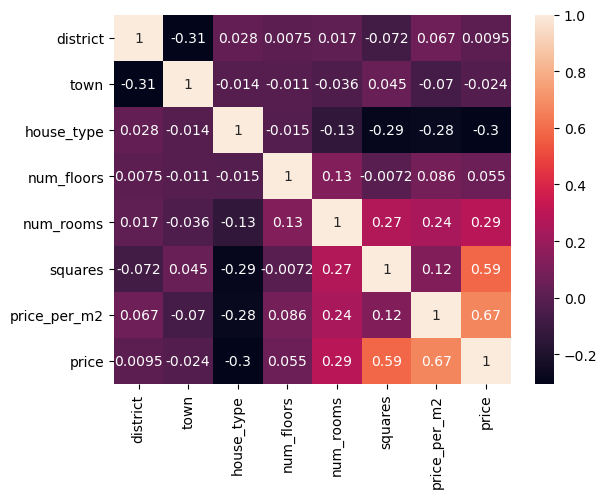

In [15]:
# scale the data
from sklearn.preprocessing import StandardScaler
# convert paper_type to binary


# encode categorical variables using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['district'] = le.fit_transform(df['district'])
df['town'] = le.fit_transform(df['town'])
df['house_type'] = le.fit_transform(df['house_type'])


df_paper = df[df['paper_type'] == 'Đã có sổ'].drop(['paper_type'], axis=1)
df_no_paper = df[df['paper_type'] == 'Chưa có sổ']

scaler = StandardScaler()
df_paper_scaled = scaler.fit_transform(df_paper)

# correlation matrix
corr_matrix = df.corr()
corr_matrix

# visualize correlation matrix in Seaborn using a heatmap
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)    
plt.show()

In [21]:
# using random forest to select features
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

X = df_paper_scaled[:, 1:]
y = df_paper_scaled[:, 0]

print(X.shape, y.shape)
# feature selection
sel = SelectFromModel(RandomForestRegressor(n_estimators = 1000))
sel.fit(X, y)

sel.get_support()

# selected_feat= X[(sel.get_support())]
# len(selected_feat)

# print(selected_feat)



(52393, 7) (52393,)


array([ True, False, False, False, False, False, False])

In [24]:
# using OLS to regress
import statsmodels.api as sm
X = df_paper_scaled[:, 1:]
y = df_paper_scaled[:, 0]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     922.4
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        22:07:28   Log-Likelihood:                -71298.
No. Observations:               52393   AIC:                         1.426e+05
Df Residuals:                   52385   BIC:                         1.427e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.588e-16      0.004  -3.85e-14      1.0